
<Bh4>Построим общую модели на основе случайных полей и статической модели блокировки.
    В круге с центром=целевой приемник(всенаправленная антенна), распределены, согласно Пуассоновскому равномерному точечному процессу, интерферирующие устройства(направленная антенна с рандомным углом ориентаци) и блокирующие объекты.
    Применяется модель распространения сигнала Cone. 
    
 * Если сигнал от интерферирующего передатчика до целевого приемника проходит через блокирующий объект, то он не создает помех на целевом приемнике. 
 * Если целевой приемник не попадает в сектор диаграммы направленности интерферирующего передатчика, то соответствующий интерферирующий сигнал тоже не создает помех.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
import random
from numpy.linalg import norm #для нахождения длины
from numpy import arccos, dot, pi, cross #dot вычисляет скалярное произведение двух массивов
                                         #cross работа с векторами

In [2]:
def sectors(set_x, set_y, gamma, fix_ang):  
    # Получение векторов для отрисовки сектора видимости
    sector1_vector1_x = set_x + Q * np.cos(gamma)
    sector1_vector1_y = set_y + Q * np.sin(gamma)
    sector1_vector2_x = set_x + Q * np.cos(gamma + fix_ang)
    sector1_vector2_y = set_y + Q * np.sin(gamma + fix_ang)
    return ( sector1_vector1_x, sector1_vector1_y, sector1_vector2_x, sector1_vector2_y )

In [3]:
# Функция проверки вхождения точки в сектор прямой видимости
def if_inside_sector(set_x, set_y, x_c, y_c, gamma, fix_ang):
    atan = (math.atan2((y_c-set_y),(x_c-set_x))) #Atan2() возвращает функцию atan(у/х), в радианах.
    if atan < 0:
        atan = 2 * np.pi + atan
    return (atan >= gamma and atan <= (gamma + fix_ang))

In [4]:
#круги_блокаторы
def plot_circle (x,y,r):
    angles = np.linspace(0,2*np.pi,50)
    x_cir = x+r*np.cos(angles)
    y_cir = y+r*np.sin(angles)
    plt.plot(x_cir,y_cir,'red')

In [5]:
# определим точки пересечения блокаторов с прямоугольником, где A,B - концы отрезка прямой видимости, 
# а C - точки, как центры блокаторов
def check_block(A, B, C):
    CA = (C - A) / norm(C - A) # норма _ нахождение расстояния между точками.
    BA = (B - A) / norm(B - A)
    CB = (C - B) / norm(C - B)
    AB = (A - B) / norm(A - B)
    
    if arccos(dot(CA, BA)) > 1: # при помощи данной строки мы находим углы, где BA или AB-вектор прямой видимости
        return norm(C - A) # CA или CB вектор расстояния от центра блокатора до отдной из границ отрезка
    if arccos(dot(CB, AB)) > 1:
        return norm(C - B)
    return norm(cross(A - B, A - C)) / norm(B - A)

In [6]:
def crossing(circle_point, point_1, point_2):
    list_point = np.array
    return np.round(check_block(list_point(point_1), list_point(point_2), list_point(circle_point)), 1) <= D

In [7]:
#Данные для интерферирующих устройств
guard_size = 10
R=10 # радиус; центр=целевой приемник
B = 0.09 # интенсивность точечного Пуасссоновского процесса
fix_ang = np.random.uniform(0, np.pi) # угол диаграммы направленности
Q=2 # радиус интерферирующих устройств
P=1 # мощность сигнала антенн

#Данные для элементов блокировки
A=0.05 # интенсивность точечного Пуасссоновского процесса 
D=1 # радиус

In [8]:
# задаем круг радиуса R и центром=передатчик
x = np.random.uniform(0,guard_size) #x координаты центра окружности
y = np.random.uniform(0,guard_size) #y координаты центра окружности
circle_angel=np.linspace(0, 2*np.pi)
circle_x= x+R*np.cos(circle_angel)
circle_y=y+R*np.sin(circle_angel)

In [9]:
# интерферирующие устройства
PP = np.random.poisson(B*guard_size**2) #кол-во случайных точек
set_x = []
set_y = []
dots_counter = 0
while dots_counter < PP:
    r=R*np.sqrt(np.random.uniform(0,guard_size)) #генерируем новый радиус
    angle = np.random.uniform(0,np.pi*2) #генерируем новый угол
    x_inc = np.cos(angle)*r
    y_inc = np.sin(angle)*r
    if x_inc**2+y_inc**2 < R**2:
        set_x.append(x_inc+x)
        set_y.append(y_inc+y)
        dots_counter += 1

In [10]:
# Блокирующие элементы
WW = np.random.poisson(A*guard_size**2) #кол-во случайных точек
block_x = []
block_y = []
dots_counter = 0
while dots_counter < WW:
    rw=R*np.sqrt(np.random.uniform(0,guard_size)) #генерируем новый радиус
    angle_w = np.random.uniform(0,np.pi*2) #генерируем новый угол
    x_block = np.cos(angle_w)*rw
    y_block = np.sin(angle_w)*rw
    
    if x_block**2+y_block**2 < R**2:
        block_x.append(x_block+x)
        block_y.append(y_block+y)
        dots_counter +=1

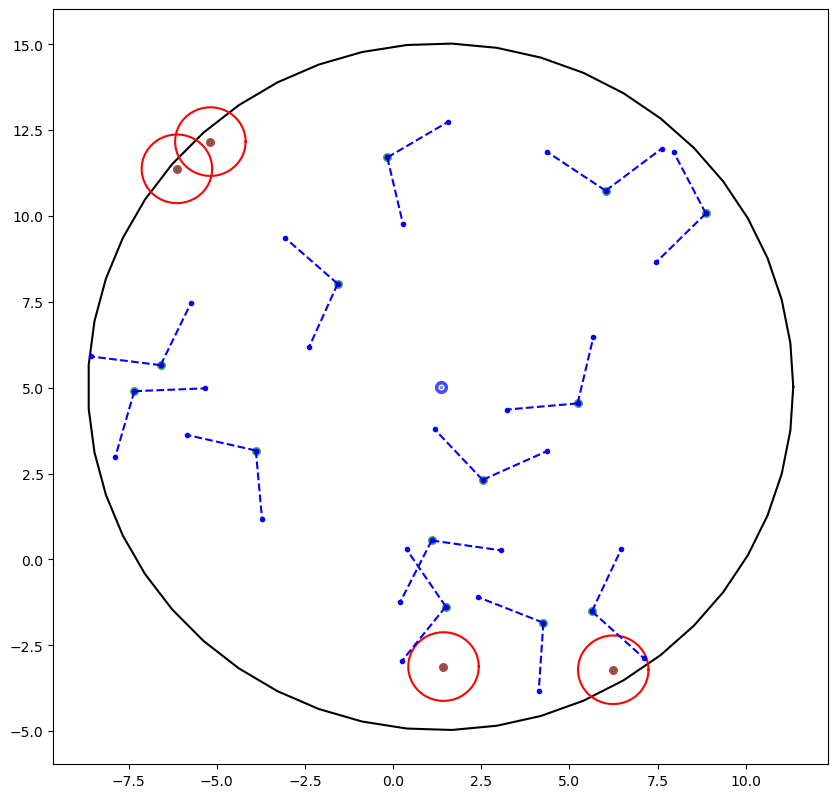

In [11]:
fig=plt.figure(dpi=100, figsize=(10,10))
# выводим круг радиуса R и центром=передатчик
plt.plot(x,y,'.', alpha=0.7, label='target transmitter', mec='b', mew=7, ms=5)
plt.plot(circle_x,circle_y,'black')
# выводим интерферирующие устройства
plt.plot(set_x, set_y, '.', alpha=0.7, label='interfering devices', lw=5, mec='g', mew=4, ms=5)
# выводим блокирующие элементы
plt.plot(block_x ,block_y, '.', alpha=0.7, label='interfering devices', lw=5, mec='maroon', mew=4, ms=5)
for i in range(len(block_x)): #рисуем блокаторы
    plot_circle(block_x[i], block_y[i], D)
# выводим диаграмму направленности
gamma = np.random.uniform(0, 2 * np.pi, PP)
for i in range(PP):
    # Углы для получения векторов секторов видимости абонентов
    (sector1_vector1_x, sector1_vector1_y, sector1_vector2_x, sector1_vector2_y) = sectors(set_x[i], set_y[i], gamma[i], fix_ang)
    plt.plot([set_x[i],sector1_vector1_x], [set_y[i],sector1_vector1_y],'.--b')
    plt.plot([set_x[i],sector1_vector2_x], [set_y[i],sector1_vector2_y],'.--b')

<p style="text-indent: 25px;">На основе полученной модели построим графики среднего значения
интерференции как функции от направленности антенн, интенсивности Пуассоновского поля источников интерферирующих устройств, интенсивности Пуассоновского поля блокирующих объектов. 
</p>

In [12]:
condition1 = [] # Попадает ли целевой приемник в сектор прямой видимости интерферирующего устройства
condition2 = [] # Блокируется ли интерферирующее устрйоство блокатором
for i in range(PP):
    if (if_inside_sector(set_x[i], set_y[i], x, y, gamma[i], fix_ang)):
        condition1.append((set_x[i], set_y[i]))
for i in range(len(condition1)):
    for j in range(WW):
        if ( crossing((block_x[j], block_y[j]), condition1[i], (x,y) )):
            condition2.append(i)
np.delete(condition1, condition2)
print("Количество интерференций =", len(condition1))

Количество интерференций = 3


In [13]:
# Вычисление плотности мощности
G=2/(1-math.cos(fix_ang/2))
power_density=[]
distance=[]
for i in range(len(condition1)):
    distance.append(math.hypot(x - condition1[i][0], y - condition1[i][1]))
for i in range(len(condition1)):
    power_density.append(P*(G/(4*np.pi*distance[i]**2)))
print("Количество интерференции = ", sum(power_density))

Количество интерференции =  0.07376197440320231


In [14]:
# Функция построение модели
def start_model(A, B, fix_ang):
    power_density_set = []
    experiments_nimber = 1000
    while (experiments_nimber > 0):
        # Генерация Интерферирующих объектов
        PP = np.random.poisson(B*guard_size**2) #кол-во случайных точек
        set_x = []
        set_y = []
        dots_counter_PP = 0
        while dots_counter_PP < PP:
            r=R*np.sqrt(np.random.uniform(0,guard_size)) #генерируем новый радиус
            angle = np.random.uniform(0,np.pi*2) #генерируем новый угол
            x_inc = np.cos(angle)*r
            y_inc = np.sin(angle)*r
            if x_inc**2+y_inc**2 < R**2:
                set_x.append(x_inc+x)
                set_y.append(y_inc+y)
                dots_counter_PP += 1
        # Генерация блокирующих объектов
        WW = np.random.poisson(A*guard_size**2) #кол-во случайных точек
        block_x = []
        block_y = []
        dots_counter_WW = 0
        while dots_counter_WW < WW:
            rw=R*np.sqrt(np.random.uniform(0,guard_size)) #генерируем новый радиус
            angle_w = np.random.uniform(0,np.pi*2) #генерируем новый угол
            x_block = np.cos(angle_w)*rw
            y_block = np.sin(angle_w)*rw
            
            if x_block**2+y_block**2 < R**2:
                block_x.append(x_block+x)
                block_y.append(y_block+y)
                dots_counter_WW +=1
    
        gamma = np.random.uniform(0, 2 * np.pi, PP)
        # Углы для получения векторов секторов видимости абонентов
        condition1 = [] # Попадает ли целевой приемник в сектор прямой видимости интерферирующего устройства
        conition2 = [] # Блокируется ли интерферирующее устрйоство блокатором
        for i in range(PP):
            if (if_inside_sector(set_x[i], set_y[i], x, y, gamma[i], fix_ang)):
                condition1.append((set_x[i], set_y[i]))
        for i in range(len(condition1)):
            for j in range(WW):
                if ( crossing((block_x[j], block_y[j]), condition1[i], (x,y) )):
                    condition2.append(i)
        # Вычисление плотности мощности
        power_density=[]
        distance=[]
        for i in range(len(condition1)):
            distance.append(math.hypot(x - condition1[i][0], y - condition1[i][1]))
            
        for i in range(len(condition1)):
            power_density.append(P*(G/(4*np.pi*distance[i]**2)))
    
        #print("Количество интерференций = ", sum(power_density))
        power_density_set.append(sum(power_density))
        
        experiments_nimber -= 1
    
    return np.mean(power_density_set)

In [15]:
diagram1_means = []
diagram1_fix_ang = np.linspace(0, np.pi, 10)
diagram1_A = 0.05
diagram1_B = 0.09
for i in range(10):
    fix_ang = diagram1_fix_ang[i]
    diagram1_means.append(start_model(diagram1_A, diagram1_B, fix_ang))

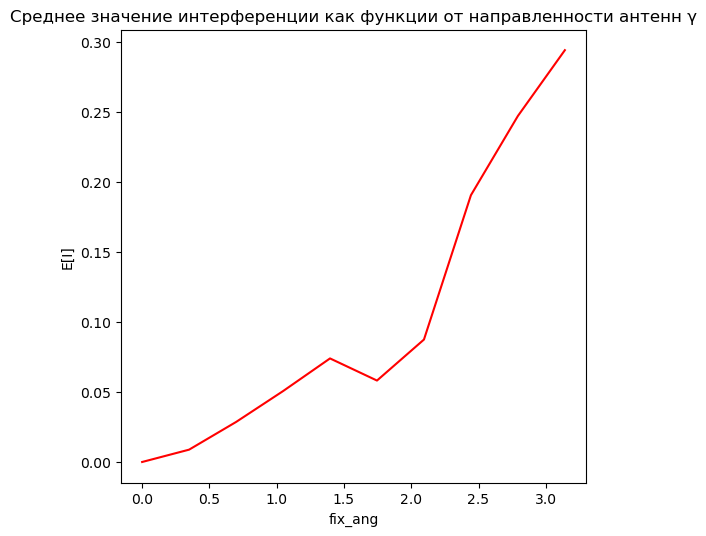

In [16]:
plt.figure(dpi=100,figsize=(6,6))
plt.title('Cреднее значение интерференции как функции от направленности антенн γ')

plt.plot(diagram1_fix_ang, diagram1_means, 'r-')

plt.xlabel('fix_ang')
plt.ylabel('E[I]')
plt.show()

In [17]:
diagram2_means = []
diagram2_fix_ang = np.random.uniform(0, np.pi)
diagram2_A = 0.05
diagram2_B = np.linspace(0, 1, 10)

for i in range(10):
    B = diagram2_B[i]  # B - интенсивность/плотность
    diagram2_means.append(start_model(diagram2_A, B, diagram2_fix_ang))

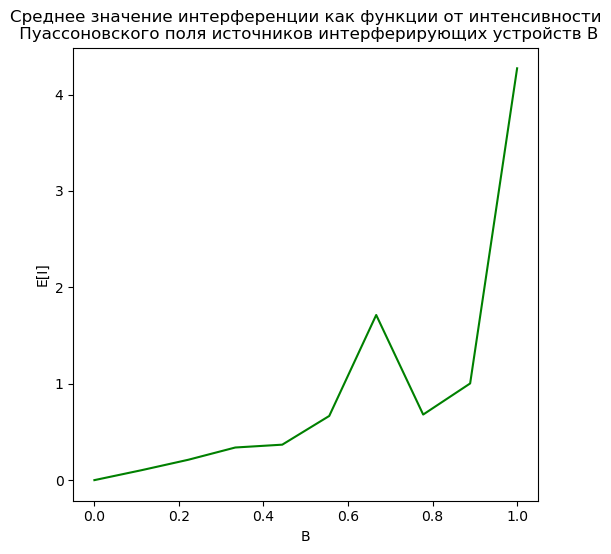

In [18]:
plt.figure(dpi=100,figsize=(6,6))
plt.title('Cреднее значение интерференции как функции от интенсивности\n Пуассоновского поля источников интерферирующих устройств B')

plt.plot(diagram2_B, diagram2_means,'g-')

plt.xlabel('B')
plt.ylabel('E[I]')
plt.show()

In [19]:
diagram3_means = []
diagram3_A = np.linspace(0, 1, 10)
diagram3_B = 0.09  # B - интенсивность/плотность
diagram3_fix_ang = np.random.uniform(0, np.pi)

for i in range(10):
    A = diagram3_A[i]
    diagram3_means.append(start_model(A, diagram3_B, diagram3_fix_ang))

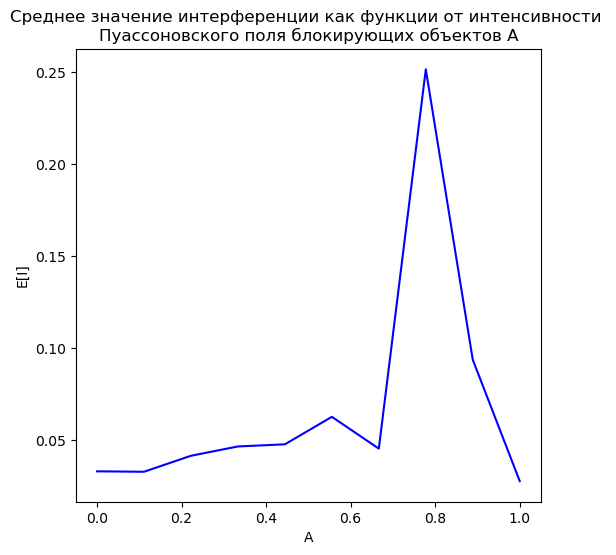

In [20]:
plt.figure(dpi=100,figsize=(6,6))
plt.title('Среднее значение интерференции как функции от интенсивности \nПуассоновского поля блокирующих объектов A')

plt.plot(diagram3_A, diagram3_means, 'b-')

plt.xlabel('A')
plt.ylabel('E[I]')
plt.show()